In [1]:
import numpy as np

from mpl_toolkits import mplot3d
import matplotlib.pyplot as plt

import seaborn

%matplotlib inline

In [2]:
N = 128

In [3]:
x = np.linspace(0, np.pi, N)
y = np.linspace(0, np.pi, N)

X, Y = np.meshgrid(x, y)

In [4]:
# case R^2

with open('../data.bin') as f_data:
    S = []
    for i, s in enumerate(f_data):
        if i % 20:
            continue
        s = list(map(float, s.strip().split()))
        s = np.asarray(s).reshape(len(x), len(y))
        S.append(s)
S[0].shape

(128, 128)

In [ ]:
# case R^3

with open('../data.bin') as f_data:
    S = []
    for i, s in enumerate(f_data):
        if i % 20:
            continue
        s = list(map(float, s.strip().split()))
        s = np.asarray(s).reshape(len(x), len(y), -1)[N // 2,:]
        S.append(s)
S[0].shape

In [5]:
S = np.asarray(S)
S.shape

(150, 128, 128)

In [6]:
X.shape, Y.shape, S[0].shape

((128, 128), (128, 128), (128, 128))

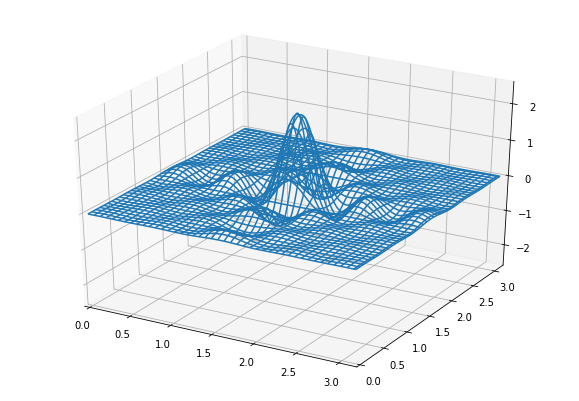

In [7]:
fig = plt.figure(figsize=(10, 7))
ax = fig.add_subplot(111, projection='3d')
ax.plot_wireframe(X, Y, S[0])
ax.set_xlim(x.min(), x.max())
ax.set_ylim(y.min(), y.max())
ax.set_zlim(-2.5, 2.5)
plt.show()

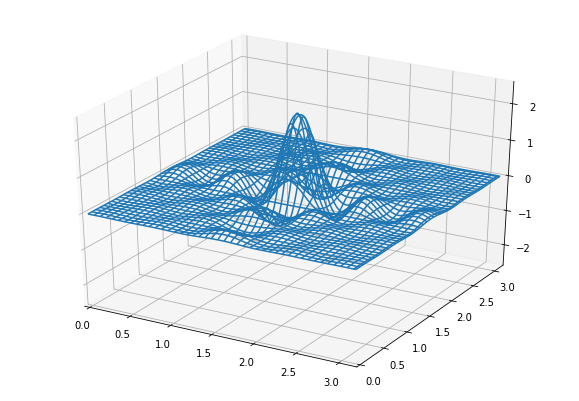

In [8]:
from matplotlib.animation import FuncAnimation

fig = plt.figure(figsize=(10, 7))
ax = fig.add_subplot(111, projection='3d')

plot = None

def animate(i):
    ax.clear()
    plot = ax.plot_wireframe(X, Y, S[i])
    ax.set_xlim(x.min(), x.max())
    ax.set_ylim(y.min(), y.max())
    ax.set_zlim(-2.5, 2.5)
    return plot,

anim = FuncAnimation(fig, animate, frames=np.arange(0, len(S)), interval=1, blit=False)
anim.save('plot_3d.gif', dpi=100, writer='imagemagick')